# 특징을 2~3개를 추출하여 모델 성능 평가하기

In [5]:
import numpy as np
import matplotlib as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris_dataset = load_iris()

# dataset key값 확인
print("iris_dataset의 key: {}".format(iris_dataset.keys()))

print("타깃의 이름: {}".format(iris_dataset['target_names']))
print("특성의 이름: {}".format(iris_dataset['feature_names']))
print("사용할 특성의 이름: {}".format(iris_dataset['feature_names'][:]))

iris_dataset의 key: dict_keys(['target_names', 'filename', 'DESCR', 'data', 'target', 'feature_names'])
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
사용할 특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris_dataset.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], train_size=100, test_size=50, random_state=1)

X_train = X_train[:,2:]
X_test = X_test[:,2:]

print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))
print(y_test)

X_train 크기: (100, 2)
y_train 크기: (100,)
X_test 크기: (50, 2)
y_test 크기: (50,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1]


# 특징 선택의 이유
irisClassification에서 각 특징간의 상관관계를 보았을 때 

- petal width
- petal length

의 상관관계가 시각적으로 제일 잘 구분되었기 때문에 두가지 특징을 뽑았다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9B2BB8E80>,
      dtype=object)

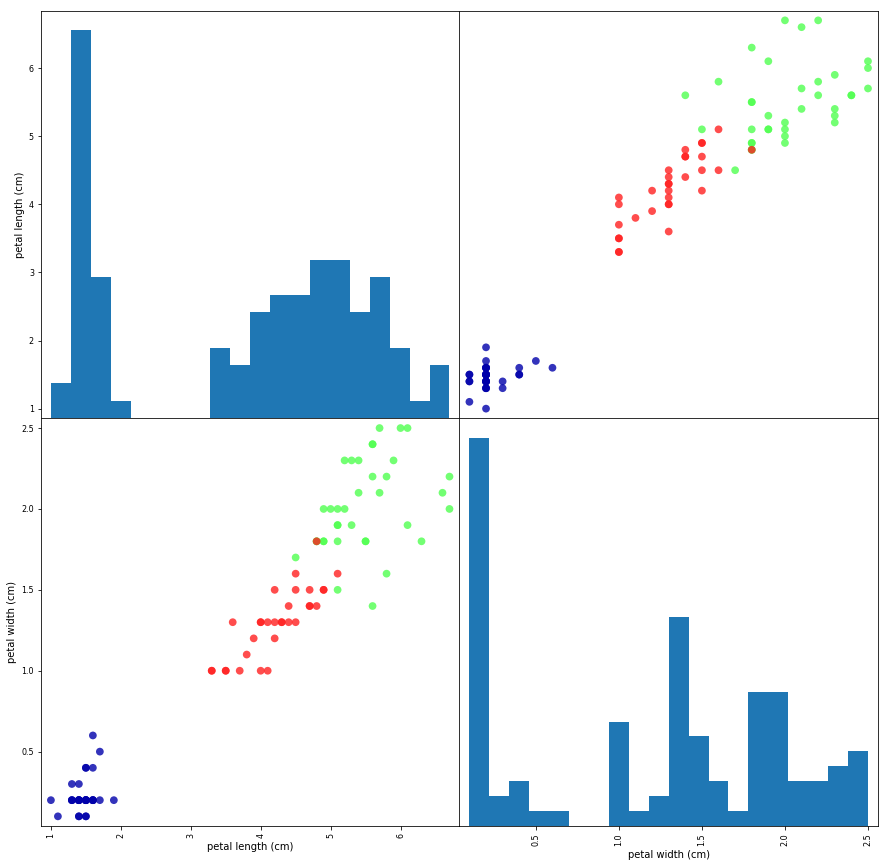

In [8]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names[2:])
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
X_new = np.array([[5, 2.9]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

X_new.shape: (1, 2)
예측: [2]
예측한 타깃의 이름: ['virginica']


In [11]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1]
테스트 세트에 대한 예측값:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]
테스트 세트의 정확도: 0.98
테스트 세트의 정확도: 0.98
